In [ ]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import numpy as np
#import pgeocode as pg
import seaborn as sns
import openpyxl

# Load zipcodes files

In [ ]:
zipcodes = gpd.read_file('data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head(50)

In [ ]:
#drop po_name so can load specific location data in
zipcodes=zipcodes[['zip','objectid','shape_stlength','shape_starea','geometry']]
zipcodes.head()

In [ ]:
leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

# Load Data files

In [ ]:
V_protocol = pd.read_csv('data/vaccine_with_protocol.csv')
C_count = pd.read_csv('data/COVID_CountByZipPerDate 03292021.csv')
zipcodes_nash=pd.read_csv('data/neighborhoods.csv')
zipcodes_nash.dtypes
#print(C_count.shape)
#C_count.head(50)
#V_protocol.isnull().sum()

###  Review data

In [ ]:
print(V_protocol.shape)
V_protocol.head( )

In [ ]:
print(C_count.shape)
C_count.head()

In [ ]:
zipcodes_nash.head()

### Rename Column Headers

In [ ]:
V_protocol=V_protocol.rename(columns={'vacc_date':'date','count_given':'count','dose_nbr':'dose'})
V_protocol

In [ ]:
C_count=C_count.rename(columns={'Specimen Collection Date':'date','Zip':'zipcode'})
C_count.head()

In [ ]:
#filling in 'NA' with 0
#V_protocol=V_protocol.fillna(0)
#changing zipcode, count, dose to integers
#V_protocol=V_protocol.astype({'zipcode':int,'count_given':int,'dose_nbr':int})
#V_protocol
#C_count.isnull().sum() 
#C_count_nonull=C_count.dropna()
#C_count.head(50)

In [ ]:
C_count.dtypes

# Change zip to int then to str

In [ ]:
#changing zip to int then to str
C_count.Zip = C_count.Zip.astype('Int64')
V_protocol.zipcode = V_protocol.zipcode.astype('Int64')
zipcodes_nash.zip = zipcodes_nash.zip.astype('str')
zipcodes_nash.dtypes

In [ ]:
C_count.Zip = C_count.Zip.astype('str')
V_protocol.zipcode = V_protocol.zipcode.astype('str')
Ethnicity_df.Zipcode =  Ethnicity_df.Zipcode.astype('str')

In [ ]:
#V_protocol.dtypes
C_count.dtypes

# Group by zipcode

In [ ]:
#groupby zip
#V_protocol_by_zip = V_protocol.groupby('zipcode')
#C_count_by_zip = C_count.groupby('zipcode')
#V_protocol


In [ ]:
#V_protocol.describe()

In [ ]:
#C_count.describe()

In [ ]:
#filling in 'NA' with 0
#C_count=C_count.fillna(0)
#changing zipcode to integers
#C_count=C_count.astype({'Zip':int})

#C_count

In [ ]:
#FINDING DUPLICATE VALUES
#duplicate_rows_df = V_protocol[V_protocol.duplicated()]
#print('number of duplicate rows: ', duplicate_rows_df.shape)

In [ ]:
#duplicate_rows_df2 = C_count[C_count.duplicated()]
#print('number of duplicate rows: ', duplicate_rows_df2.shape)

In [ ]:
#FINDING NULL VALUES
#print(V_protocol.isnull().sum())

In [ ]:
#finding distinct zipcodes
#C_count.Zip.nunique()  #name is column name, can use .column or ['column name']

In [ ]:
#set the seaborn theme, style, color palette
#sns.set(style="ticks", color_codes=True)

#make a correlation plot that looks at each variables relationship with every other variable
#and plots the distribution of each variable along the diagonal
#sns.pairplot(C_count);

In [ ]:
#creat a geoframe out of V_protocol and C_count
#V_protocol['geometry'] = V_protocol.apply(lambda x: Point((float(x.lng), 
                                                        # float(x.lat))), 
                                        #axis=1)
#bus_stops.head(3)

In [ ]:
#cases_by_zip=C_count.groupby('Zip')['Cases'].count()

In [ ]:
C_count.zipcode.value_counts()  #calculates how many rows of zipcode appears eg 37013 is 3 rows

In [55]:
#group by zipcode to get total cases per zipcode
Covid_df2 = C_count.groupby(['zipcode'],as_index=False)['Cases'].sum()
Covid_df2=Covid_df2.dropna()
Covid_df2


,zipcode,Cases
0,37013.0,13354
1,37027.0,231
2,37069.0,16
3,37072.0,2984
4,37076.0,4279
5,37080.0,574
6,37115.0,4574
7,37138.0,2359
8,37189.0,479
9,37201.0,299


In [ ]:
zipcodes.info()

In [ ]:
Covid_df_top10=Covid_df2.sort_values('Cases',ascending=False)
Covid_df_top10

In [99]:
# Read the data file in Excel into the application, Skipping the header and loading sheet 0 is actual value sheet 1 = %
population_df = pd.read_excel("data/ethnicity_data.xlsx", skiprows = 1, header=[0, 1], sheet_name = 2)
#Drop columns with Error next to each of the columns
population_df = population_df[population_df.columns.drop(list(population_df.filter(regex='Error')))]
#Drop a Level of Value headers that mean nothing to the data
population_df.columns =population_df.columns.droplevel(1)
# Remove unnecessary rows that will not be part of our statistics
#Ethnicity_df1=Ethnicity_df.drop(Ethnicity_df.index[[1,9,10,12,13,14,15,16,17,18,19,20,21]])

pos = [1,9,10,12,13,14,15,16,17,18,19,20]
population_df.drop(population_df.index[pos], inplace=True)
population_df.reset_index(inplace = True)
population_df= population_df.set_index('Unnamed: 0_level_0').T.reset_index()
population_df.rename(columns = {'index':'Zipcode'}, inplace = True)
indexNames = population_df[ population_df['Zipcode'] == 'index' ].index
population_df.drop(indexNames , inplace=True)
population_df




Unnamed: 0_level_0,Zipcode,Total:,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races:,Hispanic or Latino:
1,37010,4966,4502,245,2,27,0,0,27,163
2,37012,2185,2050,73,0,3,0,0,8,51
3,37013,97939,40080,33280,95,4250,0,374,3052,16808
4,37014,2835,2682,18,0,47,0,0,36,52
5,37015,17665,15842,304,147,107,0,5,363,897
...,...,...,...,...,...,...,...,...,...,...
114,38552,157,157,0,0,0,0,0,0,0
115,38560,1405,1307,0,2,61,0,0,35,0
116,38563,3410,3202,140,0,13,0,39,16,0
117,38567,685,615,0,0,0,0,0,45,25


In [100]:
zipcodes.dtypes


zip                float64
objectid            object
shape_stlength      object
shape_starea        object
geometry          geometry
dtype: object

In [101]:
zipcodes.zip = zipcodes.zip.astype('float')

In [102]:
Covid_geo = zipcodes.merge(Covid_df2, how="inner", left_on='zip',right_on='zipcode')


In [103]:
population_df.Zipcode = population_df.Zipcode.astype('float')

In [104]:
population_df

Unnamed: 0_level_0,Zipcode,Total:,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races:,Hispanic or Latino:
1,37010.0,4966,4502,245,2,27,0,0,27,163
2,37012.0,2185,2050,73,0,3,0,0,8,51
3,37013.0,97939,40080,33280,95,4250,0,374,3052,16808
4,37014.0,2835,2682,18,0,47,0,0,36,52
5,37015.0,17665,15842,304,147,107,0,5,363,897
...,...,...,...,...,...,...,...,...,...,...
114,38552.0,157,157,0,0,0,0,0,0,0
115,38560.0,1405,1307,0,2,61,0,0,35,0
116,38563.0,3410,3202,140,0,13,0,39,16,0
117,38567.0,685,615,0,0,0,0,0,45,25


In [105]:
Covid_geo = Covid_geo.merge(population_df, how="inner", left_on='zip', right_on='Zipcode')
Covid_geo


,zip,objectid,shape_stlength,shape_starea,geometry,zipcode,Cases,Zipcode,Total:,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races:,Hispanic or Latino:
0,37115.0,1,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ...",37115.0,4574,37115.0,40343,16611,14469,208,538,11,296,854,7356
1,37216.0,3,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ...",37216.0,2011,37216.0,17848,12041,4757,0,159,0,37,307,547
2,37204.0,9,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ...",37204.0,1786,37204.0,15452,12235,2050,54,305,0,6,503,299
3,37027.0,11,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ...",37027.0,231,37027.0,56117,47000,1889,37,3712,0,76,1069,2334
4,37027.0,31,3116.4327152718852,304596.06201171875,"MULTIPOLYGON (((-86.72012 36.00886, -86.72012 ...",37027.0,231,37027.0,56117,47000,1889,37,3712,0,76,1069,2334
5,37027.0,30,30401.649619169264,24460979.921020508,"MULTIPOLYGON (((-86.68705 36.01059, -86.68695 ...",37027.0,231,37027.0,56117,47000,1889,37,3712,0,76,1069,2334
6,37027.0,29,524.2364158788497,5803.0636596679687,"MULTIPOLYGON (((-86.72541 36.00934, -86.72540 ...",37027.0,231,37027.0,56117,47000,1889,37,3712,0,76,1069,2334
7,37027.0,28,3028.3872771754991,553384.08331298828,"MULTIPOLYGON (((-86.68475 35.99279, -86.68488 ...",37027.0,231,37027.0,56117,47000,1889,37,3712,0,76,1069,2334
8,37027.0,27,1678.1723515222479,156012.904296875,"MULTIPOLYGON (((-86.68367 35.99140, -86.68419 ...",37027.0,231,37027.0,56117,47000,1889,37,3712,0,76,1069,2334
9,37027.0,44,1315.615824819155,78289.863037109375,"MULTIPOLYGON (((-86.67793 35.98782, -86.67941 ...",37027.0,231,37027.0,56117,47000,1889,37,3712,0,76,1069,2334


In [123]:
Covid_geo['cases_per_pop']=Covid_geo['Cases']/Covid_geo['Total:']*100

In [124]:
Covid_geo

,zip,objectid,shape_stlength,shape_starea,geometry,zipcode,Cases,Zipcode,Total:,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races:,Hispanic or Latino:,cases_per_pop
0,37115.0,1,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ...",37115.0,4574,37115.0,40343,16611,14469,208,538,11,296,854,7356,11.337779
1,37216.0,3,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ...",37216.0,2011,37216.0,17848,12041,4757,0,159,0,37,307,547,11.267369
2,37204.0,9,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ...",37204.0,1786,37204.0,15452,12235,2050,54,305,0,6,503,299,11.558374
3,37027.0,11,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ...",37027.0,231,37027.0,56117,47000,1889,37,3712,0,76,1069,2334,0.411640
4,37027.0,31,3116.4327152718852,304596.06201171875,"MULTIPOLYGON (((-86.72012 36.00886, -86.72012 ...",37027.0,231,37027.0,56117,47000,1889,37,3712,0,76,1069,2334,0.411640
5,37027.0,30,30401.649619169264,24460979.921020508,"MULTIPOLYGON (((-86.68705 36.01059, -86.68695 ...",37027.0,231,37027.0,56117,47000,1889,37,3712,0,76,1069,2334,0.411640
6,37027.0,29,524.2364158788497,5803.0636596679687,"MULTIPOLYGON (((-86.72541 36.00934, -86.72540 ...",37027.0,231,37027.0,56117,47000,1889,37,3712,0,76,1069,2334,0.411640
7,37027.0,28,3028.3872771754991,553384.08331298828,"MULTIPOLYGON (((-86.68475 35.99279, -86.68488 ...",37027.0,231,37027.0,56117,47000,1889,37,3712,0,76,1069,2334,0.411640
8,37027.0,27,1678.1723515222479,156012.904296875,"MULTIPOLYGON (((-86.68367 35.99140, -86.68419 ...",37027.0,231,37027.0,56117,47000,1889,37,3712,0,76,1069,2334,0.411640
9,37027.0,44,1315.615824819155,78289.863037109375,"MULTIPOLYGON (((-86.67793 35.98782, -86.67941 ...",37027.0,231,37027.0,56117,47000,1889,37,3712,0,76,1069,2334,0.411640


In [ ]:
Covid_geo['geometry'] = Covid_df.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))),  #they are already floats can take out
                                        axis=1)

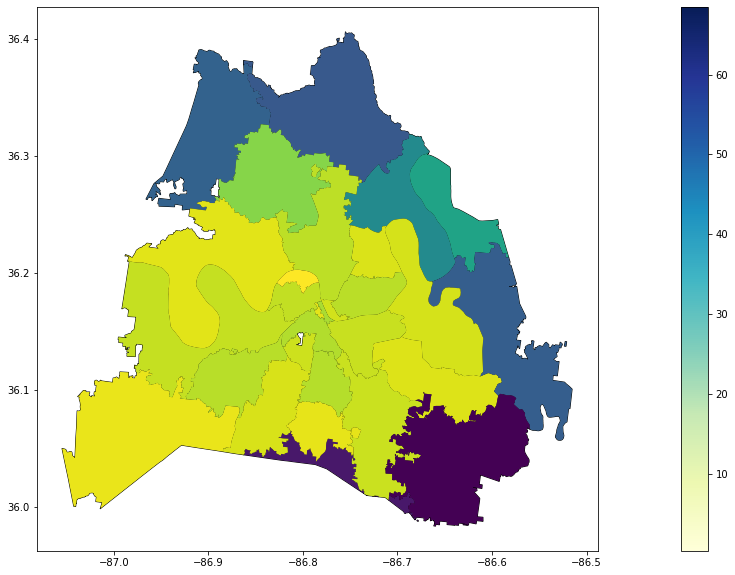

In [165]:
fig, ax = plt.subplots(figsize=(30,10))
ax=Covid_geo.plot(column = 'cases_per_pop',
             cmap = 'YlGnBu', 
             edgecolor = 'black',
             ax = ax, 
             legend=True)

Covid_geo.plot( ax = ax, column = 'zip');
#ax.axis('off');

In [ ]:
plt.bar('zipcode', 'Cases', data = C_count)
plt.xticks(rotation = 70)
#f, ax = plt.subplots(figsize=(18,5))
#plt.figure(figsize=(10, 6))
plt.title('Number of Cases by zipcode');

In [ ]:
#V_protocol.loc[(V_protocol['dose_nbr'] == '2.0') | (V_protocol['protocol'] == 'two-shot'), 'complete'] = 'Fully'  
#V_protocol.loc[(V_protocol['dose_nbr'] == '1.0') | (V_protocol['protocol'] == 'two-shot'), 'complete'] = 'Half' 
#V_protocol.loc[(V_protocol['dose_nbr'] == '1.0') | (V_protocol['protocol'] == 'one-shot'), 'complete'] = 'Fully'
#print(V_protocol.tail(50))

# create a list of our conditions
###conditions = [
    
   ### (V_protocol['dose_nbr'] == 2.0) & (V_protocol['protocol'] == 'two-shot'),
   ### (V_protocol['dose_nbr'] == 1.0) & (V_protocol['protocol'] == 'two-shot'),
   ### (V_protocol['dose_nbr'] == 1.0) & (V_protocol['protocol'] == 'one-shot')
   # ]

# create a list of the values we want to assign for each condition
##values = ['Full', 'Half', 'Full']

# create a new column and use np.select to assign values to it using our lists as arguments
##V_protocol['Complete'] = np.select(conditions, values)

##V_protocol.tail(50)




In [ ]:
#group by zipcode
Vaccine_df2 = V_protocol.groupby(['zipcode'],as_index=False)['count'].sum()
Vaccine_df2

In [ ]:
#does same thing as group by zipcode
#Vaccine_df = Vaccine_df2.groupby(['zipcode', 'count_given']).size().reset_index(name="Count")
#Vaccine_df.drop('Count',axis='columns',inplace=True)
#Vaccine_df

# Ethnicity

In [ ]:
# Read the data file in Excel into the application, Skipping the header and loading sheet 0 is actual value sheet 1 = %
Ethnicity_df = pd.read_excel("data/ethnicity_data.xlsx", skiprows = 1, header=[0, 1], sheet_name = 1)
#Drop columns with Error next to each of the columns
Ethnicity_df = Ethnicity_df[Ethnicity_df.columns.drop(list(Ethnicity_df.filter(regex='Error')))]
#Drop a Level of Value headers that mean nothing to the data
Ethnicity_df.columns =Ethnicity_df.columns.droplevel(1)
# Remove unnecessary rows that will not be part of our statistics
#Ethnicity_df1=Ethnicity_df.drop(Ethnicity_df.index[[1,9,10,12,13,14,15,16,17,18,19,20,21]])

pos = [1,9,10,12,13,14,15,16,17,18,19,20,21]
Ethnicity_df.drop(Ethnicity_df.index[pos], inplace=True)

#Rotate the dataframe so that Zip can be column and the race data set across and reset the index
Ethnicity_df.reset_index(inplace = True)
Ethnicity_df= Ethnicity_df.set_index('Unnamed: 0_level_0').T.reset_index()

In [ ]:
Ethnicity_df.head(25)

### Remove Total  and Column
### Rename index column to Zipcode 
### Remove row with 'index' for Zipcode column



In [ ]:
Ethnicity_df.drop('Total:', axis=1, inplace=True)
#Ethnicity_df.drop('Unnamed: 0_level_0', axis=1, inplace=True)
Ethnicity_df.columns


In [ ]:
Ethnicity_df.rename(columns = {'index':'Zipcode'}, inplace = True)

In [ ]:
indexNames = Ethnicity_df[ Ethnicity_df['Zipcode'] == 'index' ].index

In [ ]:
Ethnicity_df.drop(indexNames , inplace=True)

In [ ]:
ethnicity_top=Ethnicity_df.head(10)
ethnicity_top



In [ ]:
columns = Ethnicity_df.columns
columns = columns.to_list()

In [ ]:
columns

In [ ]:
for c in columns:
  Ethnicity_df[c] = pd.to_numeric(Ethnicity_df[c],'coerce')

In [ ]:
Covid_df2['zipcode']=  pd.to_numeric(Covid_df2['zipcode'],'coerce')

In [ ]:
Covid_df2.info()
Ethnicity_df.info()

In [ ]:
#Ethnicity_df
Covid_df2

## Merging Covid cases with ethnicity--inner join 

In [ ]:
Ethnicity_Cases_final=Covid_df2.merge(Ethnicity_df, how='inner', left_on='zipcode', right_on ='Zipcode')
#Ethnicity_Cases_final=Ethnicity_Cases_final.style.format({'White alone': '{:.2%}'},'Black or African American alone': '{:.2%}'})
#changing to percentages 
Ethnicity_Cases_final.iloc[:,3:]=Ethnicity_Cases_final.iloc[:,3:] *100
Ethnicity_Cases_final

In [ ]:
Ethnicity_Cases_final=Ethnicity_Cases_final.sort_values('Cases',ascending=False)

In [ ]:
Ethnicity_Cases_final
Ethnicity_Cases_final=Ethnicity_Cases_final.head(10)
Ethnicity_Cases_final= Ethnicity_Cases_final.drop('zipcode', 1)
Ethnicity_Cases_final

In [ ]:
#dropping case column so chart won't only pick up cases
df_nocase=Ethnicity_Cases_final.drop('Cases',1)
df_nocase

In [ ]:
#adding the location of zip


In [ ]:
sns.set()
sns.set_palette("tab10")
#savefig(fname, dpi=None, facecolor='w', edgecolor='w',
        #orientation='portrait', papertype=None, format=None,
        #transparent=False, bbox_inches=None, pad_inches=0.1,
        #frameon=None, metadata=None)
df_nocase.set_index('Zipcode').plot(kind='bar',stacked=True)
plt.title('Ethnicity Percent by Zipcode', size=40)
plt.xlabel('Nashville Zipcode', size=12)
plt.ylabel('Percent',size=12)
#plt.legend(loc='lower right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, prop={'size':10},borderaxespad=0.)
#plt.legend(prop={"size":20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


sns.set_context({"figure.figsize": (14, 16)})
#df_nocase = df_nocase.style.format({'perc': “{:.2%}”})


In [ ]:
savefig(fname, dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

# Merging Vaccine with zipcodes

In [ ]:
#merging vaccine with zipcodes(a geodataframe)
V_zipcodes = pd.merge(left = zipcodes, right = Vaccine_df, 
                    left_on = 'zip', right_on = 'zipcode')

#V_zipcodes.drop('po_name',axis='columns',inplace=True)          below works same in less lines
#V_zipcodes.drop('objectid',axis='columns',inplace=True)
#V_zipcodes.drop('zipcode',axis='columns',inplace=True)
#V_zipcodes.head(50)

V_zipcodes = V_zipcodes[['zip', 'shape_stlength', 'shape_starea', 'geometry', 'count_given']]
V_zipcodes.head(50)

# vaccine count and zipcode --getting rid of duplicates

In [ ]:
##drop duplicates based on zip column
V_zipcodes = V_zipcodes.drop_duplicates(subset=['zip'])
V_zipcodes

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
V_zipcodes.plot(column = 'count_given', 
              cmap = 'GnBu', 
              edgecolor = 'black', 
              ax = ax,
              legend = True)
ax.axis('off');


In [ ]:

fig, ax = plt.subplots(figsize=(30,10))
covid_zip.plot(column = 'cases',
             cmap = 'GnBu', 
             edgecolor = 'black',
             ax = ax, 
             legend=True)
ax.axis('off');

In [ ]:
vac_zip = zipcodes.merge(vaccine_df_g, how='inner', left_on='zip', right_on='zip'


In [162]:
a = Ethnicity_Cases_final['White alone']
plt.scatter('perc_hs_grad_ormore', 'vac_by_perc', marker='o', data=Ethnicity_Cases_final) #s=a/50, alpha=.5)
plt.title('Vaccines vs. Education Level')
plt.xlabel("Percentage of population with a high school diploma")
plt.ylabel('Percentage of population with at least one vaccine dose')
x = Ethnicity_Cases_final['Zipcode']
y = Ethnicity_Cases_final['Cases']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")
plt.text(80, 70, 'r = .696')
plt.savefig('hs_grad_vs_vac.png')


NameError: name 'Ethnicity_Cases_final' is not defined